In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
# Load data from CSV file
data = pd.read_csv('../../../Dataset/AKAM_Stock.csv')

# Tiền xử lí dữ liệu
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)

data

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,3/1/2019,AKAM,71.089996,71.089996,71.489998,69.739998,70.059998,1633700
1,3/4/2019,AKAM,70.290001,70.290001,71.790001,69.709999,71.550003,995000
2,3/5/2019,AKAM,70.550003,70.550003,70.989998,69.800003,70.209999,1282100
3,3/6/2019,AKAM,71.540001,71.540001,71.680000,70.510002,70.620003,1658400
4,3/7/2019,AKAM,70.470001,70.470001,71.150002,70.019997,71.089996,1353400
...,...,...,...,...,...,...,...,...
1319,5/28/2024,AKAM,92.589996,92.589996,94.150002,92.489998,93.540001,1497900
1320,5/29/2024,AKAM,90.839996,90.839996,92.379997,90.779999,92.000000,1332200
1321,5/30/2024,AKAM,90.220001,90.220001,90.889999,89.550003,90.839996,2662200
1322,5/31/2024,AKAM,92.239998,92.239998,92.410004,89.599998,90.120003,3298500


In [3]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:2:1
df = data
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [4]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4285.023, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4287.802, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4289.253, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4289.176, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4285.859, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4285.630, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4285.670, Time=0.45 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4286.972, Time=1.09 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4286.970, Time=1.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4288.148, Time=0.23 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4287.607, Time=0.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4287.664, Time=0.99 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4285.603, Time=1.64 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=4283.123, Time=0.52 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [5]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))


In [6]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data_30 = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[85.28558587 85.04079726 84.96990618 84.78684693 84.70257894 84.5596725
 84.47386712 84.35845626 84.27687411 84.18130606 84.10646266 84.0259244
 83.95863531 83.88995237 83.83017163 83.77113803 83.71840963 83.66741083
 83.62110868 83.5769068  83.53635952 83.49796867 83.46252199 83.42913401
 83.39817967 83.36911821 83.34210516 83.31679614 83.29323259 83.2711841 ]


In [7]:
# 6. Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data_60 = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[85.28558587 85.04079726 84.96990618 84.78684693 84.70257894 84.5596725
 84.47386712 84.35845626 84.27687411 84.18130606 84.10646266 84.0259244
 83.95863531 83.88995237 83.83017163 83.77113803 83.71840963 83.66741083
 83.62110868 83.5769068  83.53635952 83.49796867 83.46252199 83.42913401
 83.39817967 83.36911821 83.34210516 83.31679614 83.29323259 83.2711841
 83.25063505 83.23142298 83.21350581 83.19676302 83.18114232 83.16655021
 83.15293254 83.14021418 83.12834319 83.1172576  83.10690953 83.09724689
 83.08822652 83.07980407 83.07194113 83.06459963 83.05774565 83.05134634
 83.04537188 83.03979381 83.03458603 83.02972381 83.02518433 83.02094608
 83.01698913 83.01329478 83.00984562 83.00662536 83.00361883 83.00081182]


In [8]:
# 6. Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data_90 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[85.28558587 85.04079726 84.96990618 84.78684693 84.70257894 84.5596725
 84.47386712 84.35845626 84.27687411 84.18130606 84.10646266 84.0259244
 83.95863531 83.88995237 83.83017163 83.77113803 83.71840963 83.66741083
 83.62110868 83.5769068  83.53635952 83.49796867 83.46252199 83.42913401
 83.39817967 83.36911821 83.34210516 83.31679614 83.29323259 83.2711841
 83.25063505 83.23142298 83.21350581 83.19676302 83.18114232 83.16655021
 83.15293254 83.14021418 83.12834319 83.1172576  83.10690953 83.09724689
 83.08822652 83.07980407 83.07194113 83.06459963 83.05774565 83.05134634
 83.04537188 83.03979381 83.03458603 83.02972381 83.02518433 83.02094608
 83.01698913 83.01329478 83.00984562 83.00662536 83.00361883 83.00081182
 82.99819111 82.99574433 82.99345993 82.99132714 82.9893359  82.98747681
 82.9857411  82.98412058 82.98260761 82.98119506 82.97987625 82.97864496
 82.97749539 82.97642212 82.97542007 82.97448453 82.97361108 82.97279559
 82.972

In [9]:
# 7. Đánh giá độ chính xác validate, test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)


Testing RMSE: 24.06788261807631


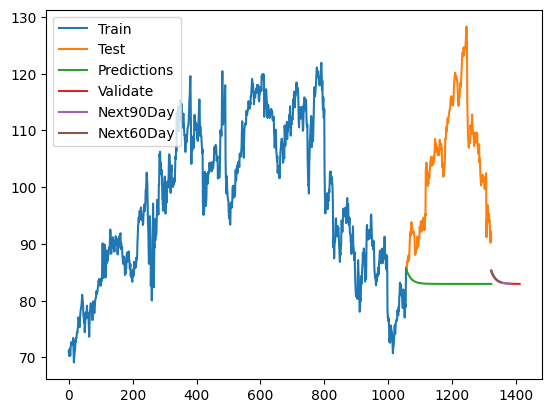

In [10]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_90,y_next_90_days)
plt.plot(last_data_60,y_next_60_days)
plt.plot(last_data_30,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next90Day', 'Next60Day', 'Next30Day'])
plt.show()

In [11]:
test_data.index

RangeIndex(start=1059, stop=1324, step=1)

In [12]:
# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

# Tính toán RMSE, MAPE và MDA
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mape = calculate_mape(y_test, y_pred)
test_mda = calculate_mda(y_test, y_pred)

# In kết quả
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MDA:', test_mda)

Testing RMSE: 24.06788261807631
Testing MAPE: 19.919636452143827
Testing MDA: 46.590909090909086
